In [ ]:
%matplotlib inline
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pprint import pprint
DATA_DIR_MOJO = os.path.join('data', 'boxofficemojo')
DATA_DIR_META = os.path.join('data', 'metacritic')
target_file_name = 'mojo_bladerunner.json'

Mojo = []
Meta = []

for target_file_name in os.listdir(DATA_DIR_MOJO):
    target_file_path = os.path.join(DATA_DIR_MOJO, target_file_name)
    with open(target_file_path, 'r') as target_file:
        movie = json.load(target_file)
    if type(movie) == dict:
        Mojo.append(movie)
    
    
for target_file_name in os.listdir(DATA_DIR_META):
    target_file_path = os.path.join(DATA_DIR_META, target_file_name)
    with open(target_file_path, 'r') as target_file:
        movie = json.load(target_file)
    if type(movie) == dict:
        Meta.append(movie)

In [2]:
mojo_df=pd.DataFrame(Mojo)
meta_df=pd.DataFrame(Meta)

merged_data = pd.merge(meta_df,mojo_df, left_on = 'title', right_on = 'title', how = 'inner')

In [ ]:
#meta_df['metascore'].hist(bins=100)

In [ ]:
#plt.scatter(merged_data.metascore, np.log(merged_data.production_budget))

In [3]:
merged_data.shape

(2434, 28)

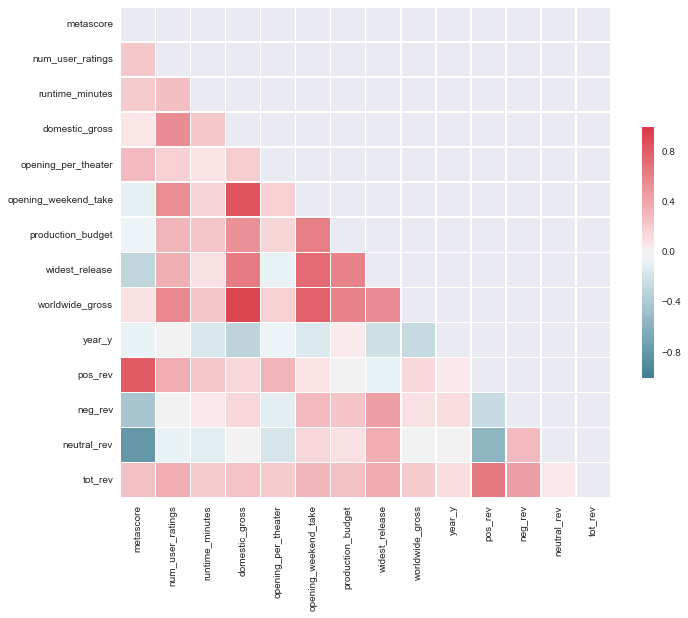

In [49]:
# Compute the correlation matrix
corr = merged_data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

In [10]:
critic_rev = []
for i in merged_data['num_critic_reviews']:
    critic_rev.append(i)
    
critic_rev = pd.DataFrame(critic_rev, columns = ['pos_rev','neg_rev','neutral_rev','tot_rev'])
merged_data = pd.concat([merged_data,critic_rev], axis = 1) 


In [ ]:
df = merged_data
s = df.apply(lambda x: pd.Series(x['genre']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'genre'
df = df.drop('genre', axis=1).join(s)

In [12]:
genre_means = df.groupby(['genre']).mean()
genre_means = genre_means.reset_index()


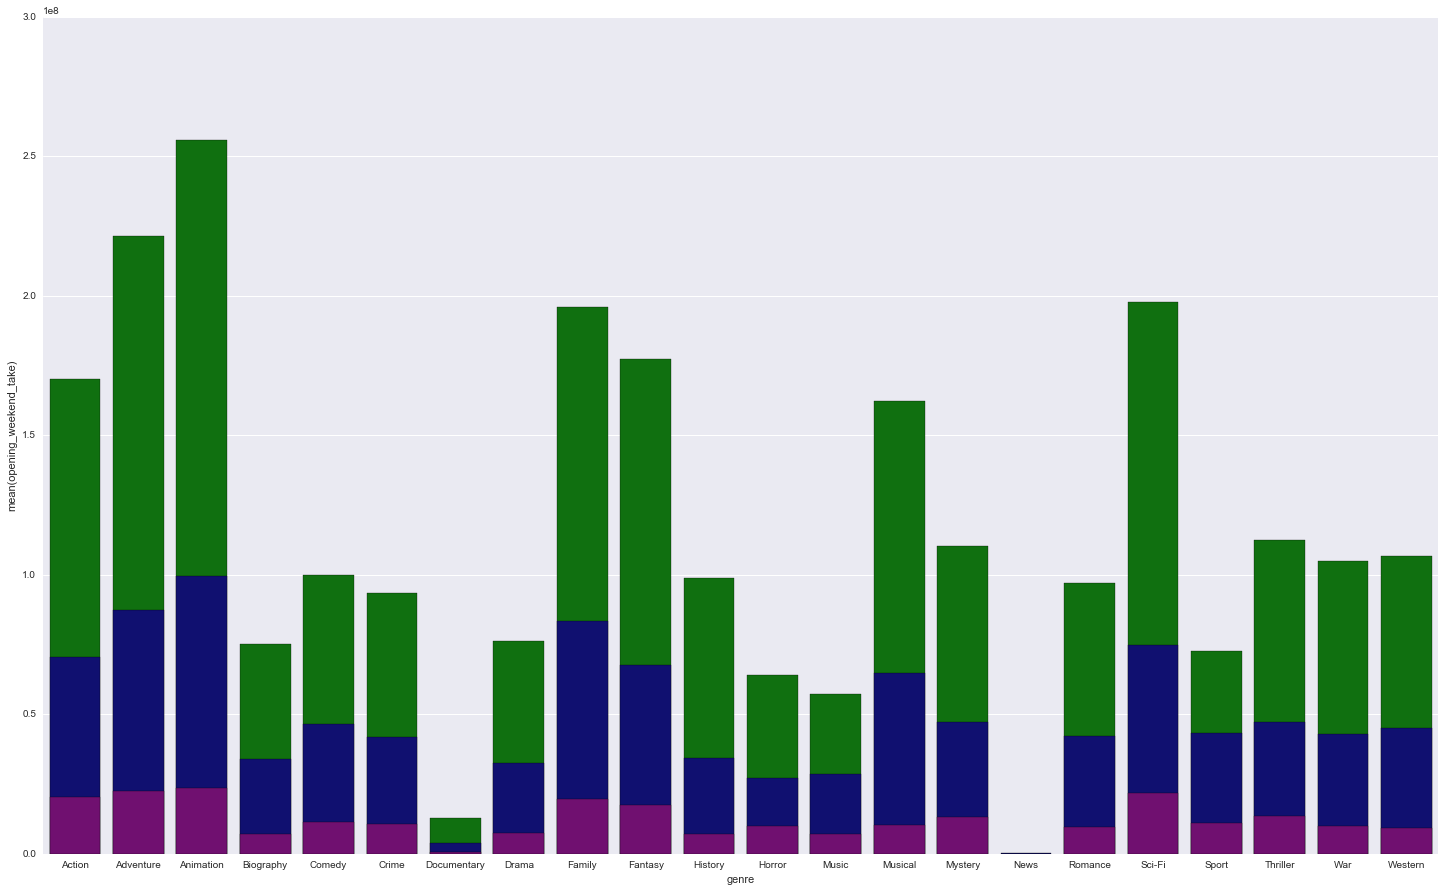

In [43]:

genre_means_cln = genre_means[~genre_means['genre'].isin(['Adult', 'Short', 'Film-Noir', ''])] # Eliminate film-noir, short, and adult films
genre_means_cln

plt.subplots(figsize=(25,15))
sns.barplot(x='genre', y='worldwide_gross', data=genre_means_cln, color='#008000');
sns.barplot(x='genre', y='domestic_gross', data=genre_means_cln, color='#000080');
sns.barplot(x='genre', y='opening_weekend_take', data=genre_means_cln, color='#800080');

C:\Users\nbl775\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


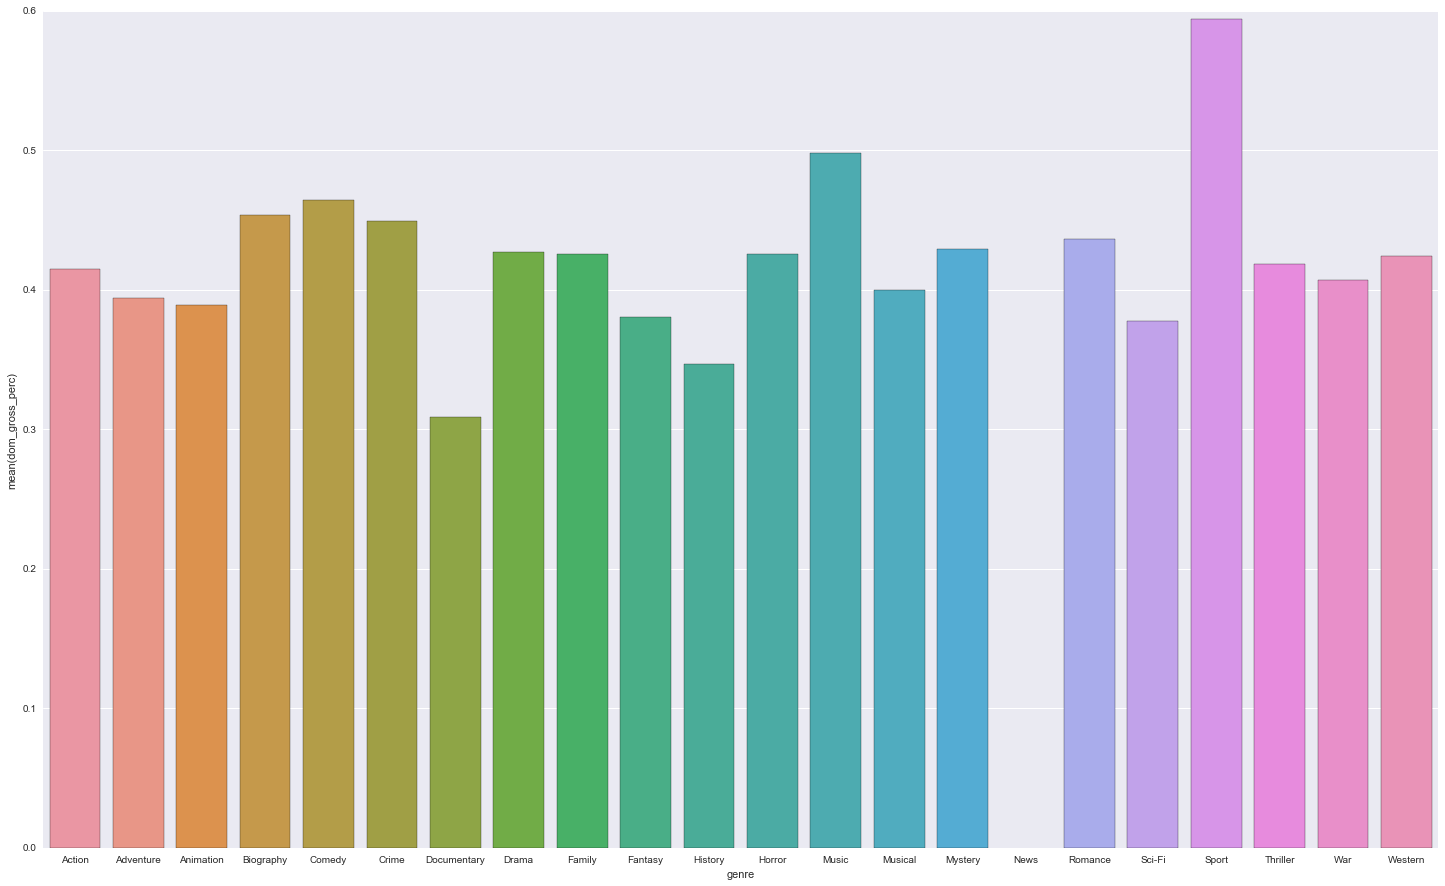

In [48]:
genre_means_cln['dom_gross_perc'] = genre_means.domestic_gross/genre_means.worldwide_gross
plt.subplots(figsize=(25,15))
sns.barplot(x='genre', y='dom_gross_perc', data=genre_means_cln);

In [42]:
director_means = df.groupby(['director_x']).mean()
director_means = director_means.reset_index()
#sns.barplot(x='director_x', y='domestic_gross', data=director_means)
